In [1]:
import scipy
from netCDF4 import Dataset
import numpy as np
from scipy.spatial import KDTree
from ll_xy import lonlat_to_xy
import itertools
import matplotlib.pyplot as plt
import datetime
import calendar
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import pickle

In [2]:
import scipy
from netCDF4 import Dataset
import numpy as np
from scipy.spatial import KDTree
from ll_xy import lonlat_to_xy
import itertools
import matplotlib.pyplot as plt
import datetime
import calendar
import pandas as pd
import tqdm
import os
import pickle


server_dir = '/home/robbie/uit_mnt'
scratch_dir = f'{server_dir}/scratch/robbie/'
satam_directory = f'{server_dir}/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
sea_ice_type_directory=f'{satam_directory}OSISAF Sea Ice Type'

# make october masks

october_masks = {}

for year in np.arange(2010,2023):
    
    month_folder = f'{sea_ice_type_directory}/{year}/10/'
    
    type_string = f'{year}{10}01'

    f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'
    
    d_type = Dataset(f'{month_folder}{f}')
    
    longrid = np.array(d_type['lon'])
    latgrid = np.array(d_type['lat'])
    
    ice_type = np.array(d_type['ice_type'][0])
    ice_type[ice_type<2] = 0
    ice_type[ice_type>4] = 0
    ice_type[ice_type>0] = 1
    ice_type[latgrid>87] = 1
    
    october_masks[year] = ice_type



In [5]:
len(october_masks.keys())

13

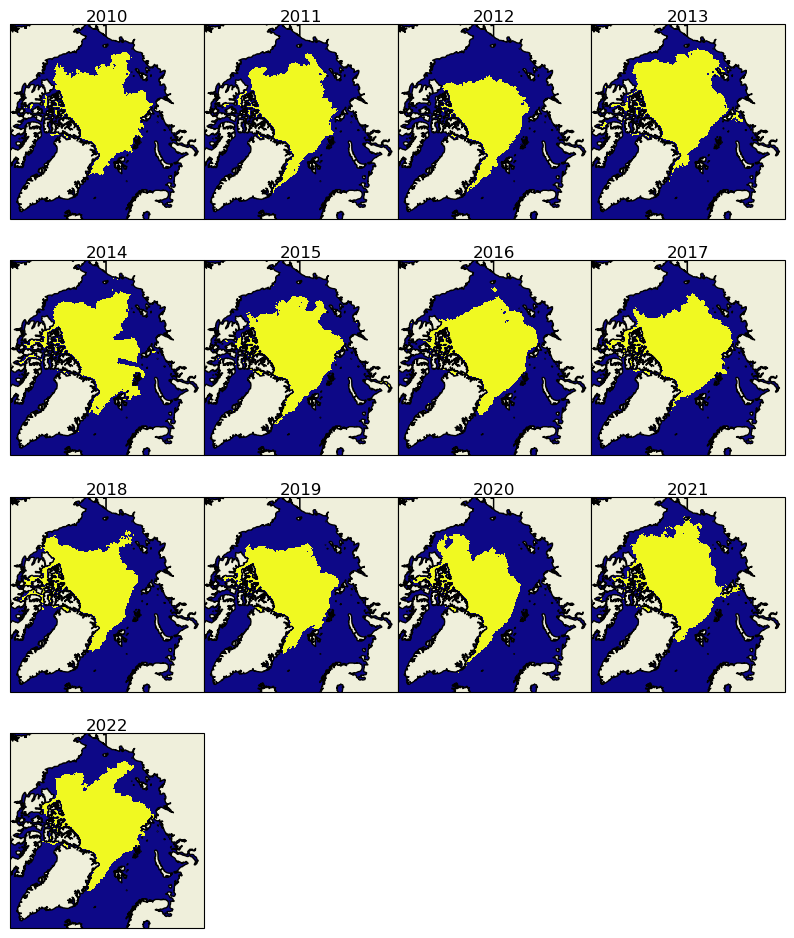

In [15]:
proj = ccrs.NorthPolarStereo()

fig,axs = plt.subplots(4,4,subplot_kw={'projection':proj},figsize=(10,12))

for key,ax in zip(october_masks.keys(),axs.reshape(-1)):
    
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())

#     ax.gridlines()

    m = ax.pcolormesh(longrid,latgrid,october_masks[key],
                     transform=ccrs.PlateCarree(),
                      zorder=0,cmap='plasma')

    ax.set_title(key,pad=-10,fontsize='large')
    
for ax in axs.reshape(-1)[-3:]:
    ax.remove()
    
fig.subplots_adjust(hspace=0.1,wspace=0)

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}october_masks.png',dpi=400,bbox_inches='tight')

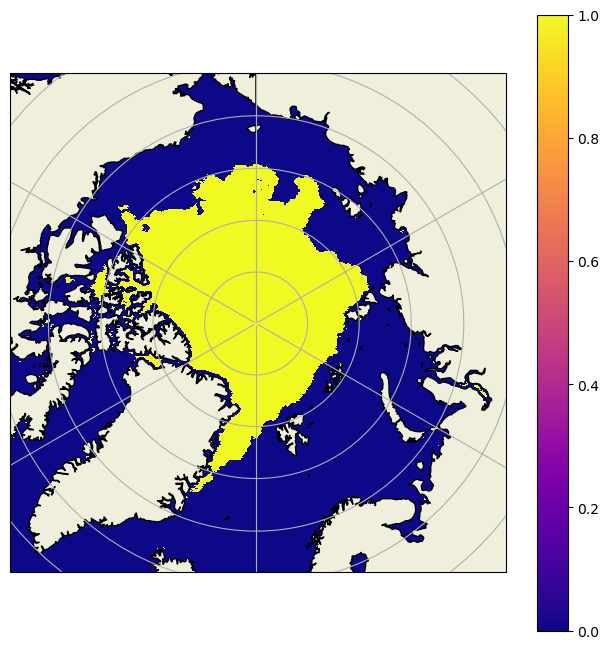

In [5]:


"""
Plots a north polar plot using cartopy. \
Must be supplied with gridded arrays of lon, lat and data
"""

# Make plot

fig = plt.figure(figsize=(8,8))

proj = ccrs.NorthPolarStereo()


ax = plt.axes(projection=proj)

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())

ax.gridlines()

m = ax.pcolormesh(longrid,latgrid,october_masks[2015],
                 transform=ccrs.PlateCarree(),
                  zorder=0,cmap='plasma')

fig.colorbar(m)